# Hello Pytorch

## 1. Pytorch 텐서
다양한 함수를 통해서 pytorch 텐서를 생성하고 initialize할 수 있습니다.
(ref: https://pytorch.org/docs/stable/torch.html)

In [1]:
import torch

In [2]:
#x = torch.Tensor(2,3)  ## without initialization
x = torch.rand(2,3)    ## random uniform
#x = torch.randn(2,3)   ## random normal
#x = torch.ones(2,3)    ## fill with ones
#x = torch.tensor([[0,1,2],[3,4,5]], dtype=torch.float)  ## with pre-existing data
print('\nx\t',x)
print('\nx.size()  ',x.size())
print('\nx.size(0) ',x.size(0))
print('\nx[0]\t',x[0])
print('\nx[:,0]\t',x[:,0])


x	 tensor([[0.3245, 0.8287, 0.6190],
        [0.9933, 0.5847, 0.0957]])

x.size()   torch.Size([2, 3])

x.size(0)  2

x[0]	 tensor([0.3245, 0.8287, 0.6190])

x[:,0]	 tensor([0.3245, 0.9933])


In [3]:
x = torch.rand(2,3)
y = torch.rand(2,3)
print(x)
print(y)

tensor([[0.8395, 0.8402, 0.1133],
        [0.2991, 0.0215, 0.9769]])
tensor([[0.7446, 0.9112, 0.7579],
        [0.1238, 0.6249, 0.1213]])


In [4]:
print('\n[1] ',x+1)
print('\n[2] ',x+torch.ones(x.size()))
print('\n[3] ',x+y)
print('\n[4] ',x+torch.tensor([0,1,2]))
print('\n[5] ',x+torch.tensor([[3],[4]]))


[1]  tensor([[1.8395, 1.8402, 1.1133],
        [1.2991, 1.0215, 1.9769]])

[2]  tensor([[1.8395, 1.8402, 1.1133],
        [1.2991, 1.0215, 1.9769]])

[3]  tensor([[1.5841, 1.7515, 0.8712],
        [0.4229, 0.6464, 1.0983]])

[4]  tensor([[0.8395, 1.8402, 2.1133],
        [0.2991, 1.0215, 2.9769]])

[5]  tensor([[3.8395, 3.8402, 3.1133],
        [4.2991, 4.0215, 4.9769]])


In [5]:
print('original : ',x.shape)
x=x.view(3,2)
print('after view(3,2) : ',x.shape)
x=x.view(-1)
print('after view(-1) : ', x.shape)
x=x.view(2,-1)
print('after view(2,-1) : ',x.shape)

original :  torch.Size([2, 3])
after view(3,2) :  torch.Size([3, 2])
after view(-1) :  torch.Size([6])
after view(2,-1) :  torch.Size([2, 3])


## 2. Pytorch nn 레이어와 모델 정의
torch.nn 모듈에서 다양한 pre-defined neural network를 불러와 사용할 수 있습니다. (ref : https://pytorch.org/docs/stable/nn.html)

In [6]:
import torch.nn as nn

Sample_X = torch.rand(8)
print(Sample_X)

tensor([0.1310, 0.2634, 0.9410, 0.6162, 0.2566, 0.3262, 0.5685, 0.9553])


In [7]:
fc_layer = nn.Linear(8,4)
Sample_Y = fc_layer(Sample_X)
print(Sample_Y.size())

torch.Size([4])


In [8]:
print(Sample_Y)
print((fc_layer.weight*Sample_X).sum(dim=-1)+fc_layer.bias)

tensor([-0.1895, -0.5073, -0.0366, -0.8217], grad_fn=<AddBackward0>)
tensor([-0.1895, -0.5073, -0.0366, -0.8217], grad_fn=<AddBackward0>)


In [9]:
Batch_X = torch.rand(4,8)
print(Batch_X)

tensor([[0.7595, 0.3448, 0.3933, 0.0606, 0.0367, 0.8567, 0.0371, 0.2250],
        [0.0824, 0.1933, 0.5905, 0.8252, 0.8417, 0.3439, 0.2559, 0.1701],
        [0.4714, 0.4662, 0.3702, 0.2033, 0.4788, 0.1701, 0.4358, 0.3054],
        [0.9978, 0.5378, 0.4414, 0.8345, 0.7145, 0.2639, 0.4171, 0.4221]])


In [10]:
print(Batch_X.shape)
Batch_Y = fc_layer(Batch_X)
print(Batch_Y.shape)

torch.Size([4, 8])
torch.Size([4, 4])


직접 모델을 생성하기 위해 torch.nn.Module 클래스를 상속받아 사용합니다.

- *\__init__()* 함수 안에서 각 레이어들과 상수 등을 정의할 수 있습니다. 클래스가 생성될 때 실행됩니다.
- *forward()* 함수에는 해당 모델의 forward pass에 실행할 코드를 작성합니다.

In [11]:
class SampleModel(nn.Module):
    def __init__(self):
        super(SampleModel, self).__init__()
        self.fc_layer = nn.Linear(8,4)
        self.c = 2
    def forward(self, x):
        x = self.fc_layer(x)
        x = x+self.c
        return x

In [12]:
fc_model = SampleModel()        ## __init__() 호출
Batch_Y2 = fc_model(Batch_X)    ##forward() 호출
print(Batch_X.shape)
print(Batch_Y2.shape)

torch.Size([4, 8])
torch.Size([4, 4])


In [13]:
class MLPModel(nn.Module):
    def __init__(self, in_dim, out_dim, h_dim=16):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(in_dim, h_dim)
        self.bn1 = nn.BatchNorm1d(h_dim)
        
        self.fc2 = nn.Linear(h_dim, h_dim)
        self.bn2 = nn.BatchNorm1d(h_dim)
        
        self.fc3 = nn.Linear(h_dim, out_dim)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [14]:
mlp_model = MLPModel(8,4)
Batch_Y3 = mlp_model(Batch_X)
print(Batch_X.shape)
print(Batch_Y.shape)

torch.Size([4, 8])
torch.Size([4, 4])


CUDA가 사용 가능한 환경이라면, 모델을 GPU에 올릴 수 있습니다.

In [15]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


In [16]:
print(Batch_X.device)

cpu


In [17]:
Batch_X = Batch_X.cuda()
print(Batch_X.device)
Batch_X = Batch_X.cpu()
print(Batch_X.device)
Batch_X = Batch_X.to(device=device)
print(Batch_X.device)

cuda:0
cpu
cuda:0


In [18]:
print(Batch_X.device)
mlp_model.cuda()
Batch_Y = mlp_model(Batch_X)
print(Batch_Y.device)

cuda:0
cuda:0


## 3. Optimizer를 활용한 Backpropagation 및 학습
torch.optim에서 학습에 사용할 pre-defined optimizer를 불러올 수 있습니다. (ref : https://pytorch.org/docs/stable/optim.html)

In [19]:
import torch.optim as optim

In [20]:
optimizer = optim.Adam(mlp_model.parameters(), lr=1e-2)

In [21]:
print(mlp_model.fc1.weight.grad)

None


In [22]:
Batch_Y = mlp_model(Batch_X)
loss = ((Batch_Y-1)**2).mean()
loss.backward()
print(mlp_model.fc1.weight.grad)

tensor([[ 8.4694e-01,  2.3544e-02,  1.8459e-02,  2.1795e-01, -3.3637e-01,
          6.9835e-01, -3.5154e-01,  6.1605e-02],
        [-2.0228e+00, -7.3659e-01,  5.9970e-01,  1.6501e+00,  1.5670e+00,
         -4.9020e-01,  1.0801e-02, -3.9959e-01],
        [-5.0785e-01, -4.3155e-02,  1.5492e-01,  7.8751e-01,  8.5422e-01,
         -6.6328e-01,  3.3448e-01,  2.2159e-02],
        [-4.6489e+00, -3.1236e+00,  2.7336e+00,  8.3660e+00,  5.2140e+00,
          1.3470e+00, -1.7164e+00, -1.4485e+00],
        [-2.9259e+00, -1.6287e+00,  2.7615e-01, -2.5169e+00, -2.1329e+00,
          2.6587e+00, -1.9616e+00, -1.3541e+00],
        [ 1.7731e+00,  8.5607e-01, -2.1232e-01,  9.3655e-01,  6.8379e-01,
         -1.0252e+00,  8.3537e-01,  6.8684e-01],
        [ 6.8641e-01,  4.3898e-01, -4.4497e-01, -1.5362e+00, -1.0241e+00,
         -2.7658e-02,  1.5473e-01,  1.7415e-01],
        [-6.1079e-01,  1.0835e+00, -1.2673e+00, -4.9356e+00, -1.9443e+00,
         -1.9561e+00,  1.3500e+00,  2.5665e-01],
        [ 2.9828

In [23]:
print('Before optimizer step : \n',mlp_model.fc1.weight)
optimizer.step()
print('After optimizer step : \n',mlp_model.fc1.weight)

Before optimizer step : 
 Parameter containing:
tensor([[-3.3010e-01,  7.6642e-02, -1.3407e-02, -3.1053e-01, -2.5538e-01,
          2.9892e-01, -1.6348e-01, -1.0211e-01],
        [-6.1281e-02,  1.5335e-01,  2.4939e-01,  1.5160e-01, -2.7049e-01,
          2.5807e-01,  9.3253e-02, -3.4537e-01],
        [ 1.3164e-01,  2.6933e-01,  3.5036e-01,  2.5524e-01, -3.1660e-01,
         -9.7655e-02,  1.0779e-01, -2.2314e-01],
        [-3.5278e-01,  2.0968e-02,  3.4320e-01, -5.4389e-02, -2.4784e-01,
         -1.8672e-01,  3.7570e-02,  3.0960e-01],
        [ 3.2852e-01, -1.8339e-01,  3.2676e-01,  2.5432e-01,  9.9421e-02,
          2.9875e-01, -1.6863e-01, -2.2087e-01],
        [-2.0554e-01, -3.4741e-01, -1.4715e-01,  1.4556e-01,  3.4592e-01,
         -4.0556e-02,  3.4941e-01, -1.1049e-01],
        [ 7.9837e-02, -9.5446e-02, -3.9200e-02, -1.7244e-01,  3.3842e-01,
         -2.8374e-01, -1.5013e-02,  2.6212e-01],
        [ 5.2201e-02,  1.7902e-01,  3.0471e-01,  1.1782e-01, -6.6130e-02,
         -2.7810e

In [24]:
print('Before zero_grad : \n',mlp_model.fc1.weight.grad)
optimizer.zero_grad()
print('After zero_grad : \n',mlp_model.fc1.weight.grad)

Before zero_grad : 
 tensor([[ 8.4694e-01,  2.3544e-02,  1.8459e-02,  2.1795e-01, -3.3637e-01,
          6.9835e-01, -3.5154e-01,  6.1605e-02],
        [-2.0228e+00, -7.3659e-01,  5.9970e-01,  1.6501e+00,  1.5670e+00,
         -4.9020e-01,  1.0801e-02, -3.9959e-01],
        [-5.0785e-01, -4.3155e-02,  1.5492e-01,  7.8751e-01,  8.5422e-01,
         -6.6328e-01,  3.3448e-01,  2.2159e-02],
        [-4.6489e+00, -3.1236e+00,  2.7336e+00,  8.3660e+00,  5.2140e+00,
          1.3470e+00, -1.7164e+00, -1.4485e+00],
        [-2.9259e+00, -1.6287e+00,  2.7615e-01, -2.5169e+00, -2.1329e+00,
          2.6587e+00, -1.9616e+00, -1.3541e+00],
        [ 1.7731e+00,  8.5607e-01, -2.1232e-01,  9.3655e-01,  6.8379e-01,
         -1.0252e+00,  8.3537e-01,  6.8684e-01],
        [ 6.8641e-01,  4.3898e-01, -4.4497e-01, -1.5362e+00, -1.0241e+00,
         -2.7658e-02,  1.5473e-01,  1.7415e-01],
        [-6.1079e-01,  1.0835e+00, -1.2673e+00, -4.9356e+00, -1.9443e+00,
         -1.9561e+00,  1.3500e+00,  2.5665e-

In [36]:
print('Before training : \n',Batch_Y)
for i in range(100):
    Batch_Y = mlp_model(Batch_X)
    loss = ((Batch_Y-1)**2).mean()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print('After training : \n',Batch_Y)

Before training : 
 tensor([ 0.4735, -1.6492, -0.3480,  0.7830,  1.1861,  0.5347,  0.7234,  1.6596,
         1.8204,  0.8860,  1.3644,  0.1231, -0.3901, -1.6033,  0.8328,  1.6987,
         0.6870,  0.0339,  1.1514, -1.6896,  0.1849,  1.2115, -0.3384, -0.0382,
         0.1941, -0.5657,  1.8123, -0.9354,  0.0938,  0.9030, -0.0524,  1.5934,
        -0.4202,  0.3825, -0.5724,  0.1581, -1.6893,  0.4306, -1.1601,  0.7596,
        -0.1780,  0.2312,  0.6300,  1.6892, -1.4460, -0.1677,  0.0269,  0.1748,
         1.4565,  0.3508, -0.9079,  0.2169,  0.9577, -0.1100, -0.8404,  0.0758,
         0.5217,  1.5039, -0.6451,  0.5180,  0.5058,  0.7696, -1.9519,  0.1327,
        -1.3455,  0.5000,  1.5791,  0.5829,  0.3601, -0.0275,  0.9339, -1.3236,
        -0.5490, -0.0909,  1.0516, -1.1427, -1.1461, -0.4477,  1.6527,  0.7015,
         1.1500,  0.2403,  1.8458, -1.0651,  0.7534,  1.7870,  1.0219, -0.1715,
         0.3813,  0.0298,  1.6916,  0.5178, -0.1839,  1.0568, -0.3543,  1.0722,
        -0.0610,  0.

## 4. Pytorch 모델 학습 파이프라인

In [37]:
X = torch.rand(1000,2)
Y = torch.sin(X[:,0]*10)+torch.sin(X[:,1]*10)


print(X.shape)
print(Y.shape)
print(testX.shape)

torch.Size([1000, 2])
torch.Size([1000])
torch.Size([500, 2])


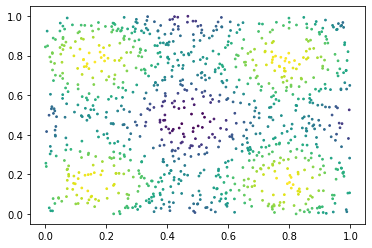

In [38]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(X[:,0],X[:,1], s=3, c=Y)
plt.show()

In [39]:
X=X.cuda()
Y=Y.cuda()

In [40]:
mlp_model = MLPModel(2,1)
mlp_model.cuda()
optimizer = optim.Adam(mlp_model.parameters(), lr=1e-2)

pred = mlp_model(X)
loss = nn.MSELoss()(pred.squeeze(-1),Y) # MSELoss : ((pred-Y)**2).mean()
loss.backward()
optimizer.step()
optimizer.zero_grad()

In [41]:
mlp_model = MLPModel(2,1)
mlp_model.cuda()
optimizer = optim.Adam(mlp_model.parameters(), lr=1e-2)

for b in range(10):
    Batch_X = X[b*100:(b+1)*100]
    Batch_Y = Y[b*100:(b+1)*100]
    
    pred = mlp_model(Batch_X)
    loss = nn.MSELoss()(pred.squeeze(-1),Batch_Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [42]:
mlp_model = MLPModel(2,1)
mlp_model.cuda()
optimizer = optim.Adam(mlp_model.parameters(), lr=1e-2)

losses = []
for e in range(100):
    avg_loss = 0.0
    n=0
    
    for b in range(10):
        Batch_X = X[b*100:(b+1)*100]
        Batch_Y = Y[b*100:(b+1)*100]

        pred = mlp_model(Batch_X)
        loss = nn.MSELoss()(pred.squeeze(-1),Batch_Y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    avg_loss = (n*avg_loss + loss.item())/(n+1)
    n += 1
    losses.append(avg_loss)

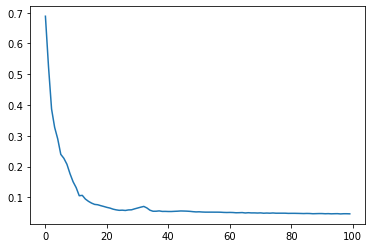

In [43]:
plt.plot(losses)

In [45]:
testX = torch.rand(500,2)
testX = testX.cuda()

In [46]:
mlp_model.eval() # reset to training : mlp_model.train()

pred_Y = []
with torch.no_grad():
    for b in range(10):
        Batch_X = testX[b*100:(b+1)*100]
        pred = mlp_model(Batch_X)
        pred_Y.append(pred.cpu())
pred_Y = torch.cat(pred_Y, dim=0)

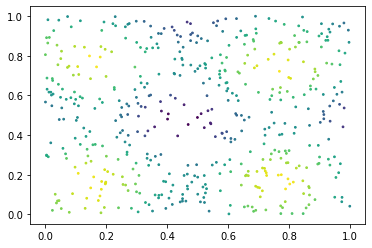

In [47]:
plt.scatter(testX[:,0].cpu(),testX[:,1].cpu(), s=3, c=pred_Y)
plt.show()